In [1]:
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
df.shape

(545, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df['furnishingstatus'].value_counts()

furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64

<Axes: ylabel='price'>

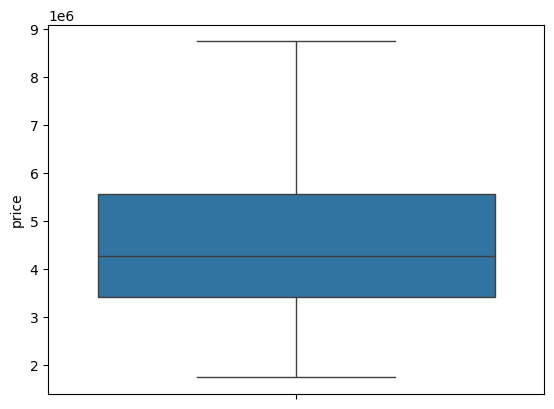

In [15]:
sns.boxplot(df['price'])


In [14]:
q1=df['price'].quantile(0.25)
q3=df['price'].quantile(0.75)
iqr=q3-q1
lower_limit=q1-1.5*iqr
upper_limit=q3+1.5*iqr
df=df[(df['price']>lower_limit) & (df['price']<upper_limit)]
df.shape

(525, 13)

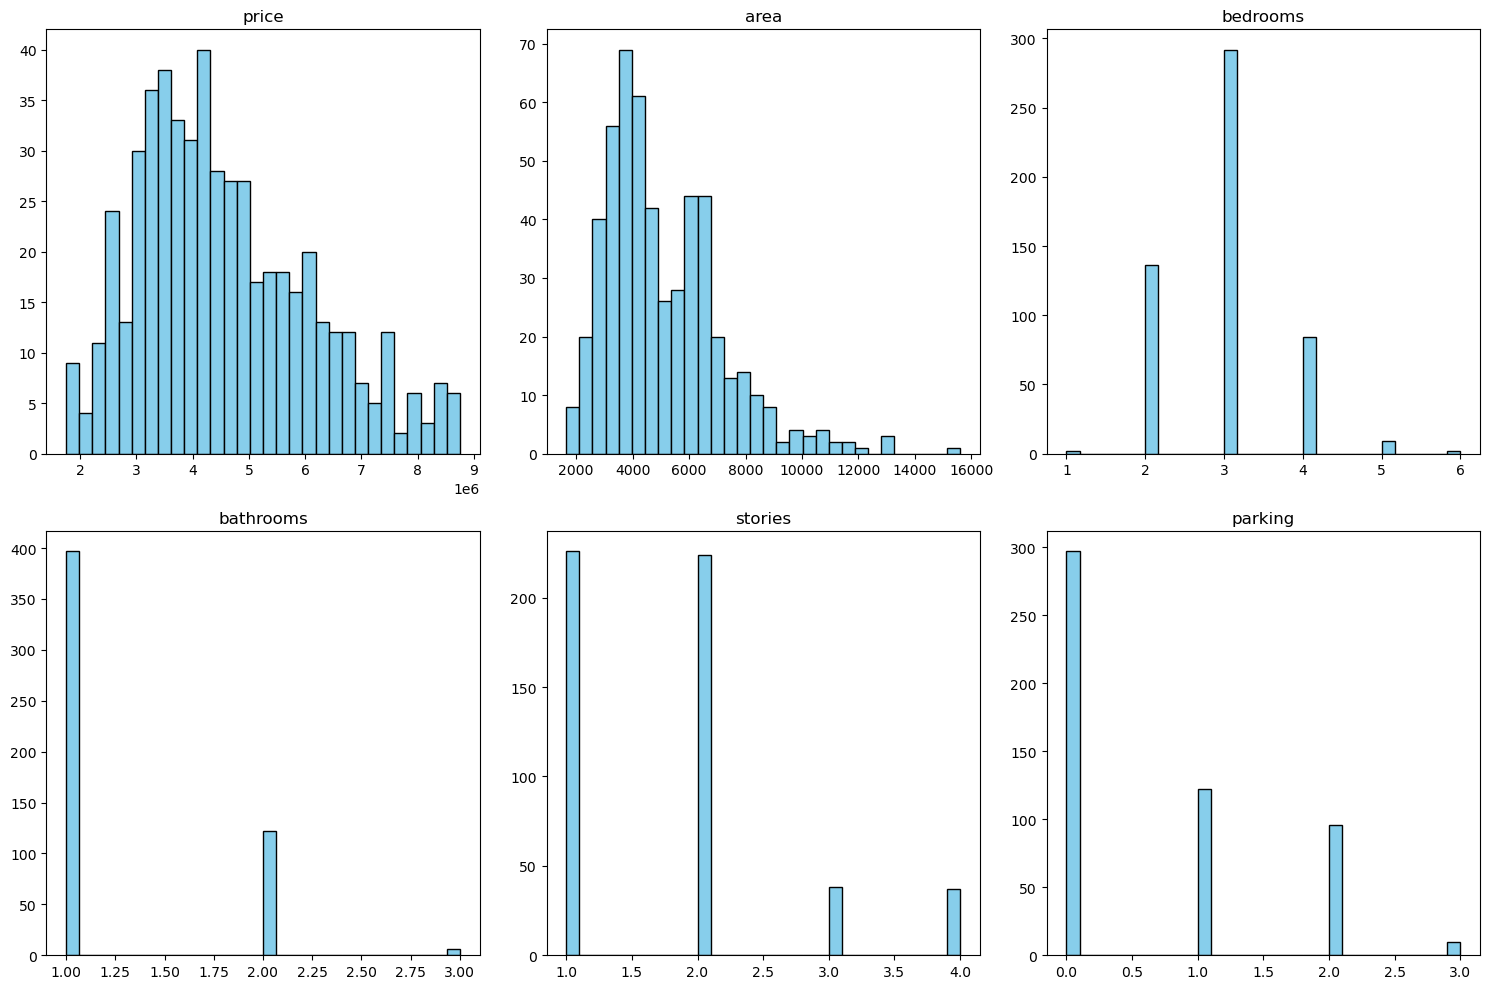

In [16]:


# Example dataframe
# Replace with your own dataset
# df = pd.read_csv("your_file.csv")

# Select only numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Set number of subplots (rows, cols) based on number of numeric columns
n_cols = 3   # number of plots per row
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols  # calculate needed rows

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot histograms
for i, col in enumerate(numeric_cols):
    axes[i].hist(df[col], bins=30, color="skyblue", edgecolor="black")
    axes[i].set_title(col)

# Hide empty subplots if columns < n_rows*n_cols
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


<Axes: >

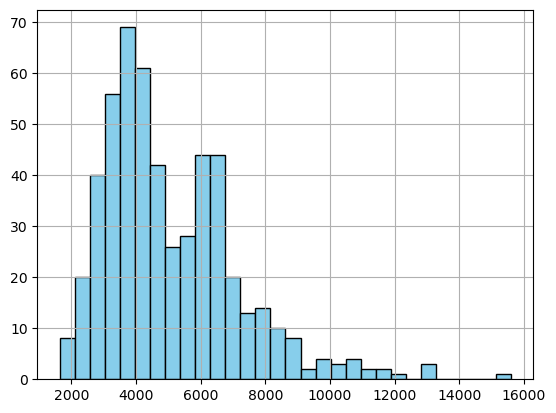

In [17]:
df['area'].hist(bins=30,color='skyblue',edgecolor='black')

<Axes: ylabel='area'>

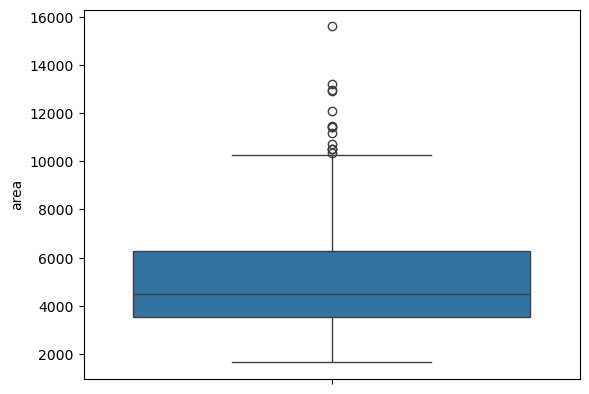

In [19]:
sns.boxplot(df['area'])

In [20]:
q1=df['area'].quantile(0.25)
q3=df['area'].quantile(0.75)
iqr=q3-q1
lower_limit=q1-1.5*iqr
upper_limit=q3+1.5*iqr
df=df[(df['area']>lower_limit) & (df['area']<upper_limit)]
df.shape

(511, 13)

<Axes: xlabel='area', ylabel='Count'>

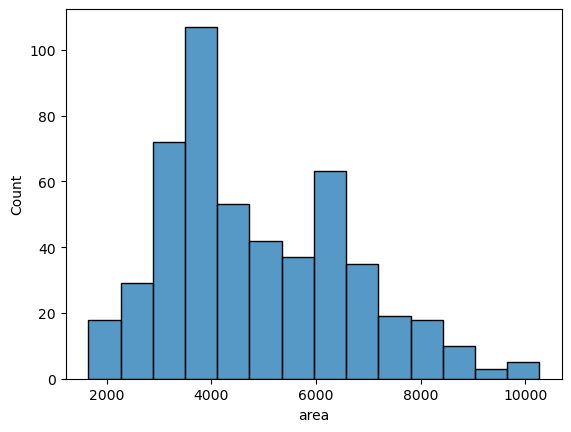

In [21]:
sns.histplot(df['area'])

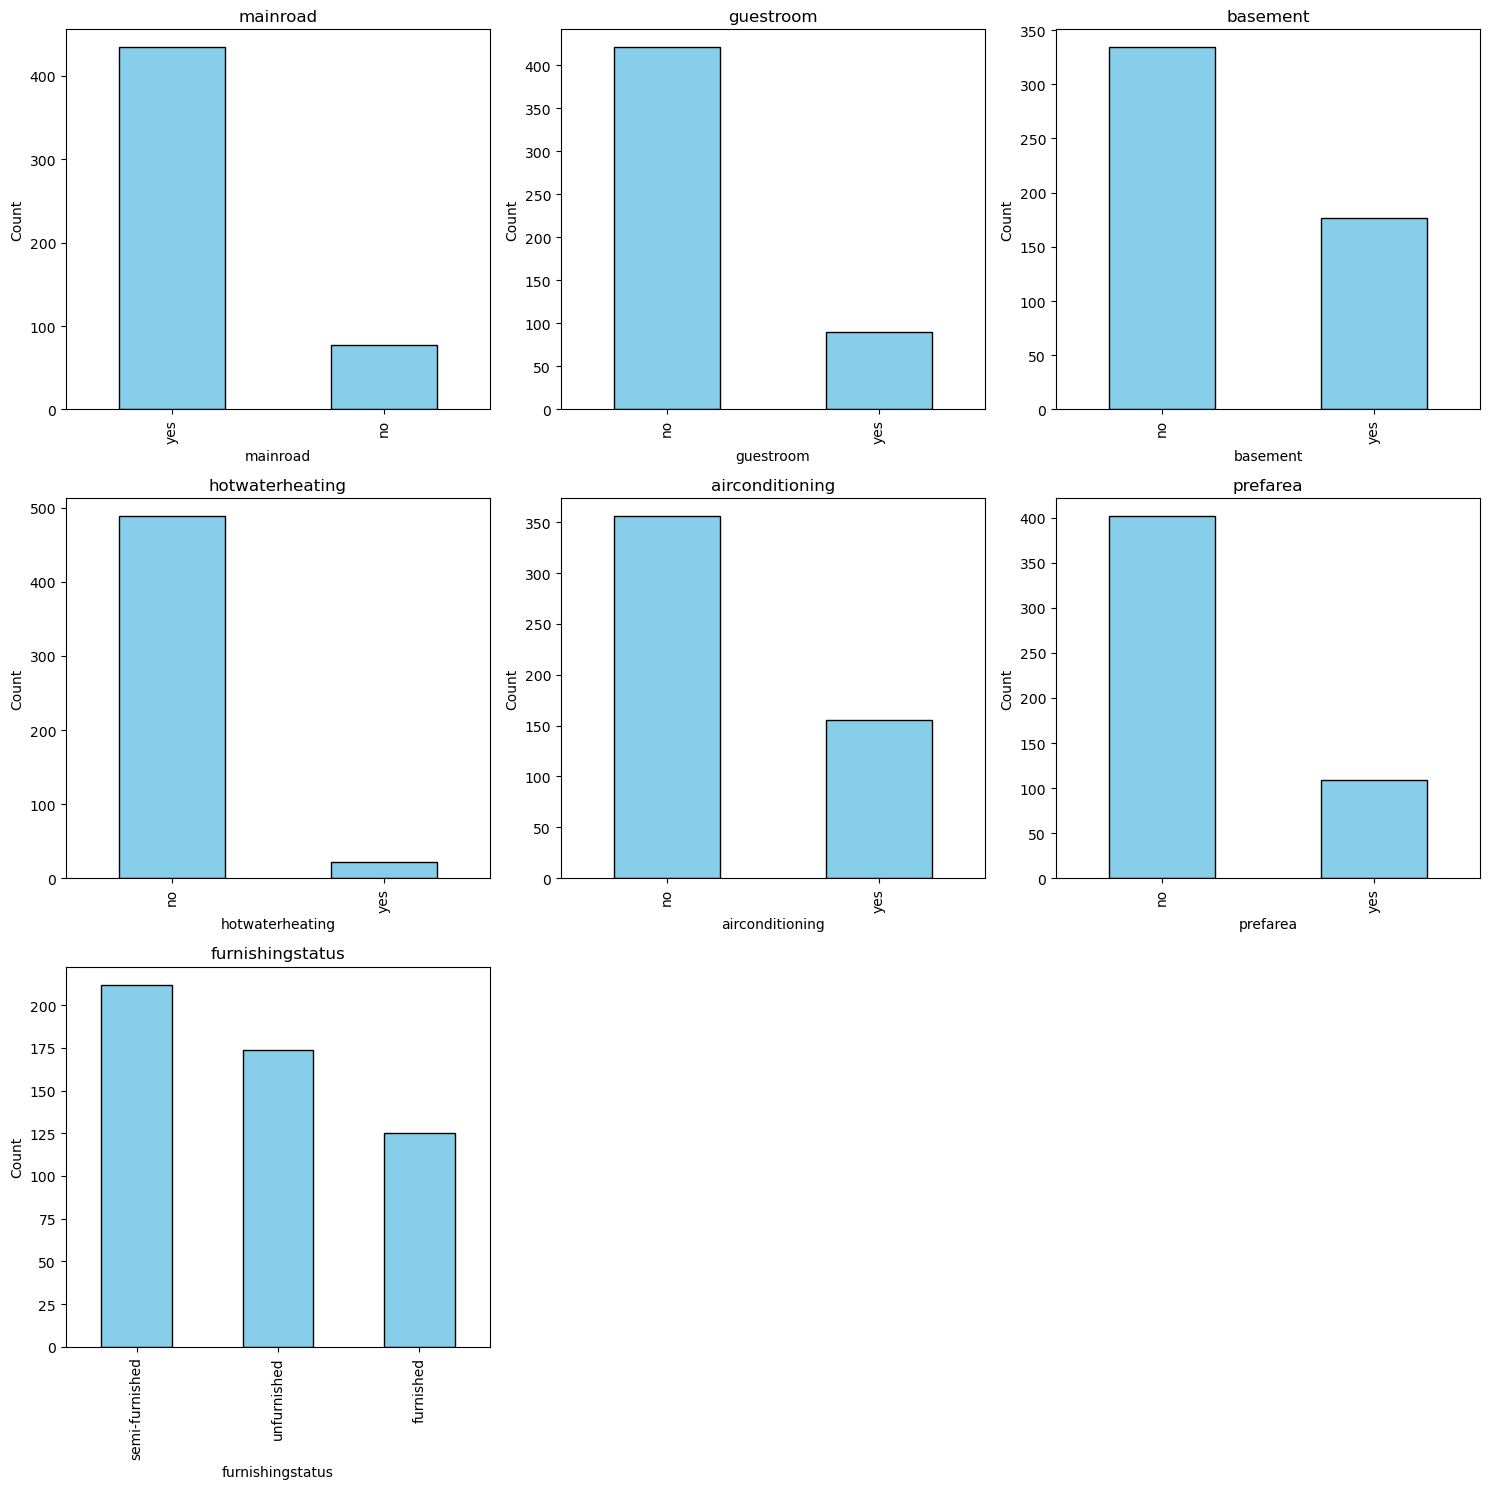

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Example dataframe
# df = pd.read_csv("your_file.csv")

# Select categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Set subplot grid
n_cols = 3   # number of plots per row
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
axes = axes.flatten()

# Plot bar charts for categorical variables
for i, col in enumerate(categorical_cols):
    df[col].value_counts().plot(kind='bar', ax=axes[i], color="skyblue", edgecolor="black")
    axes[i].set_title(col)
    axes[i].set_ylabel("Count")

# Hide empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
